## printer voorbeeld
- influence diagram maken voor printer en fouten die kunnen optreden



In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import math

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## printer werking
#### happy flow
- er is een opdracht voor de printer
- papier wordt uit lade geladen
- inkt wordt op papier aangebracht
- papier wordt omgedraaid
- inkt wordt op papier aangebracht
- papier wordt naar uitbak geleid

##### extern waarneembare triggers voor inroepen reparatiedienst
- geen resultaat (uitbak is leeg, mechanisch probleem, papier/inkt op, 
- wel resultaat maar kwaliteit niet goed (inkt is op, mechanisch issue,  

## hoe modelleren?
ID voorbeeld modellen modelleren algemene status van een patient of printer als systeem. Wat als we niet kijken naar algemene status maar naar een individuele case. Voordeel is dan dat er een procesview mogelijk is en bewaking voortgang en kwaliteit. 


#### werking printer vastleggen via secundair proces:
- flow
- data

#### flow
Stappen geven voortgang van het proces aan. Dmv een audit trail en status is duidelijk waar het proces zich bevindt, welke stage en in welke stap. Indien er geen output is dan kan de stap worden geindentificeerd waar het probleem zich bevindt. Modellering stap in ID:
- Stap afgerond met waarden ja / nee
- Afronden stap is afhankelijk van afronden voorgaande stappen en eventuele inhoudelijke variabelen (inktniveau)

#### data 
De "data" reflecteert de inhoudelijke status van het proces. Als een stage of stap inhoudelijk iets toevoegd dan wordt dat aan de data toegevoegd. data is dan:
- wifi staat aan en is verbonden met netwerk
- ruimte voorraad buffer voor opdrachten en aantal opdrachten
- opdrachtgegevens; naam / eigenaar van een opdracht, omvang te printen bestand, ...
- papier voorraad in de inbak en formaat
- iets met rollers om papier te brengen
- inktlevels
- hoeveelheid papier in uitbak
- kwaliteit van prints
- aantal gemaakte prints sinds onderhoud

#### trigger voor reparateur: geen prints 

Gegeven een kansverdeling van de oorzaken van groot naar klein
- verbruikselementen zoals geen papier, inkt op, geen opdracht, ...
- mechanische problemen zoals vastgelopen papier, inktkoppen zitten dicht, ...
- electronische problemen zoals geen wifi, buffer vol, storingen

proces voor de reparateur
- check verbruikselementen, indien die goed zijn bekijk mechanische elemente etc

de kans nodes zijn te relateren aan de dataelementen, een kansnode kan bijvoorbeeeld zijn: 
- zwarte inkt cartrigde met waarden voor voldoende / onvoldoende of een percentage 0/10/20/30 etc. De CPT laat dan zien wat de kans is op een bepaalde waarde aan inktvoorraad (bijv leeg)
- processtap zoals papier keren voor dubbelzijdig printen, de waarden van een procestap zijn dan: niet gestart / gestart / succesvol afgerond of exceptie. De kansverdeling geeft de kans weer op volbrengen van de stap

influence diagram:
- vanuit "geen resultaat" loop je terug in het proces tot en met geen opdracht ontvangen
- als een niet is afgerond dan kan dat komen door de kans op oorzaken


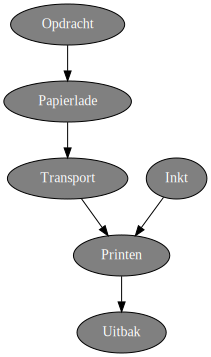

In [16]:
# maak diagram instantie
diag = gum.InfluenceDiagram()

# ============ kans nodes ============ 
# PyAgram api: LabelizedVariable(aName, aDesc=’’, nbrLabel=2) -> LabelizedVariable

# kansnode voor initiele opdracht
olvar = gum.LabelizedVariable("Opdracht", "Opdracht", 2)
olvar.changeLabel(0, 'niet OK')
olvar.changeLabel(1, 'OK')
Opdracht=diag.addChanceNode(olvar)

# kansnode voor inbak, er is wel / geen papier
alvar = gum.LabelizedVariable("Papierlade", "Papierlade", 2)
alvar.changeLabel(0, 'niet aanwezig')
alvar.changeLabel(1, 'aanwezig')
Papierlade=diag.addChanceNode(alvar)

# kansnode voor inkt, voldoende of onvoldoende
ilvar = gum.LabelizedVariable("Inkt", "Inkt", 2)
ilvar.changeLabel(0, 'onvoldoende')
ilvar.changeLabel(1, 'voldoende')
Inkt=diag.addChanceNode(ilvar)

# kansnode voor processtap printen 
plvar = gum.LabelizedVariable("Printen", "Printen", 2)
plvar.changeLabel(0, 'niet gestart')
plvar.changeLabel(1, 'gestart')
#plvar.changeLabel(2, 'afgerond')
Printen=diag.addChanceNode(plvar)

# kansnode voor transportmechanisme, dit werkt of werkt niet
tlvar = gum.LabelizedVariable("Transport", "Transport", 2)
tlvar.changeLabel(0, 'niet gestart')
tlvar.changeLabel(1, 'gestart')
Transport=diag.addChanceNode(tlvar)

# kansnode voor uitbak, indien er geprint wordt dan OK, anders NIET OK
blvar = gum.LabelizedVariable("Uitbak", "Uitbak", 2)
blvar.changeLabel(0, 'niet OK')
blvar.changeLabel(1, 'OK')
Uitbak=diag.addChanceNode(blvar)


# ============ arcs ============ 
# opdracht is start proces
diag.addArc(diag.idFromName("Opdracht"),Papierlade)
# transporteren is afankelijk van voldoende papier
diag.addArc(diag.idFromName("Papierlade"),Transport)
# resultaat is afhankelijk van printen
diag.addArc(diag.idFromName("Printen"),Uitbak)
# printen is afhankelijk van transport van papier
diag.addArc(diag.idFromName("Transport"),Printen)
# printen is afhankelijk van voldoende inkt
diag.addArc(diag.idFromName("Inkt"),Printen)

# ============ decision nodes ============ 
# decision: inkt bijvullen
#dilvar = gum.LabelizedVariable("DI","Inkt bijvullen",2)
#dilvar.changeLabel(0, 'yes')
#dilvar.changeLabel(1, 'no')
#DI=diag.addDecisionNode(dilvar)

# voldoende inkt is afhankelijk van inkt bijvullen
#diag.addArc(diag.idFromName("DI"),Inkt)

# ============ decision nodes ============ 
# definitie utility: optimaal indien er een resultaat is
#ulvar = gum.LabelizedVariable("U","U",1)
#ulvar.changeLabel(0, 'U(Uitbak, DI)')
#U=diag.addUtilityNode(ulvar)

# arc van "inkt bijvullen" en "uitbak" naar utility 
#diag.addArc(diag.idFromName("DI"),U)
#diag.addArc(diag.idFromName("Uitbak"),U)


# laat diagram zien
gnb.showInfluenceDiagram(diag)

de kans dat er iets in de uitbak zit is afhankelijk van:
- of er geprint is maar dit is afhankelijk van...
- of er papier is getransporteerd van inbak naar printkoppen
- of er papier in de inbak zit 

als de inkt op is dan kan een besluit zijn om inkt bij te vullen
als papier op is dan kan een besluit zijn om papier bij te vullen
als je een van deze dingen doet dan neemt de utility toe
utility is optimaal als er een resultaat in de uitbak zit